In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import calendar
plt.style.use('ggplot')
%matplotlib inline

In [2]:
westMaui = pd.read_csv('hui-west-maui-thru-2020-4th-quarter.0.csv')

In [3]:
southMaui = pd.read_csv('hui-south-maui-thru-2020-4th-quarter.0.csv')

In [4]:
westMaui.head()

,Unnamed: 0,SampleID,SiteName,Station,Session,Date,Time,Temp,Salinity,DO,...,Turbidity,TotalN,TotalP,Phosphate,Silicate,NNN,NH4,Lat,Long,QA issues or comments
0,1,RPO160614,Pohaku,RPO,1,6/14/16,8:03,25.7,33.3,6.86,...,13.90,311.07,26.26,18.72,1697.47,233.11,2.81,20.967083,-156.681390,NaN
1,2,RKS160614,Kaanapali Shores,RKS,1,6/14/16,8:37,24.9,23.8,6.86,...,16.80,75.08,18.80,9.06,1720.37,5.65,4.15,20.949331,-156.691124,NaN
2,3,RAB160614,Airport Beach,RAB,1,6/14/16,9:15,26.8,35.0,6.72,...,2.62,91.26,10.73,8.46,604.37,24.72,1.88,20.936669,-156.692780,NaN
3,4,RCB160614,Canoe Beach,RCB,1,6/14/16,9:50,27.2,34.7,6.78,...,5.86,117.22,16.68,9.40,576.28,49.04,2.27,20.910347,-156.689382,NaN
4,5,RWA160614,Wahikuli,RWA,1,6/14/16,10:24,27.3,34.6,6.66,...,3.47,84.60,24.07,12.38,822.08,21.35,1.50,20.904476,-156.685931,NH4 below detectable limit


In [5]:
southMaui.head()

,Unnamed: 0,SampleID,SiteName,Station,Session,Date,Time,Temp,Salinity,DO,...,Turbidity,TotalN,TotalP,Phosphate,Silicate,NNN,NH4,Lat,Long,QA issues or comments
0,1,KWP171107,Waipuilani Park,KWP,1,11/7/17,8:20,26.1,33.7,5.47,...,8.20,132.62,17.13,12.14,700.23,42.91,6.68,20.755056,-156.459602,NaN
1,2,KKS171107,Kihei South (Lipoa),KKS,1,11/7/17,9:05,26.8,34.7,5.97,...,5.17,141.30,13.44,8.81,395.31,25.26,5.24,20.747334,-156.457881,NaN
2,3,KKP171107,Kalama Park,KKP,1,11/7/17,9:27,27.0,34.8,6.26,...,8.47,96.36,11.27,7.87,279.65,28.38,4.63,20.730973,-156.453720,NaN
3,4,KCP171107,Cove Park,KCP,1,11/7/17,9:55,26.9,34.3,6.24,...,1.12,376.91,24.78,22.58,1017.21,224.04,31.10,20.727434,-156.450077,NaN
4,5,KKO171107,Kamaole Beach I,KKO,1,11/7/17,10:23,27.7,35.0,6.44,...,1.00,146.98,11.93,7.35,397.99,24.47,4.70,20.721985,-156.448183,NaN


In [6]:
#drop extra column
southMaui = southMaui.drop('Unnamed: 0', axis=1)
westMaui = westMaui.drop('Unnamed: 0', axis=1)

In [7]:
#26 sites
westMaui.groupby('Station').mean().shape

(26, 15)

In [8]:
#26 sites
southMaui.groupby('Station').mean().shape

(26, 15)

In [9]:
westMaui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SampleID               1555 non-null   object 
 1   SiteName               1555 non-null   object 
 2   Station                1555 non-null   object 
 3   Session                1555 non-null   int64  
 4   Date                   1555 non-null   object 
 5   Time                   1555 non-null   object 
 6   Temp                   1555 non-null   float64
 7   Salinity               1552 non-null   float64
 8   DO                     1553 non-null   float64
 9   DO_sat                 1555 non-null   float64
 10  pH                     1542 non-null   float64
 11  Turbidity              1553 non-null   float64
 12  TotalN                 1472 non-null   float64
 13  TotalP                 1472 non-null   float64
 14  Phosphate              1472 non-null   float64
 15  Sili

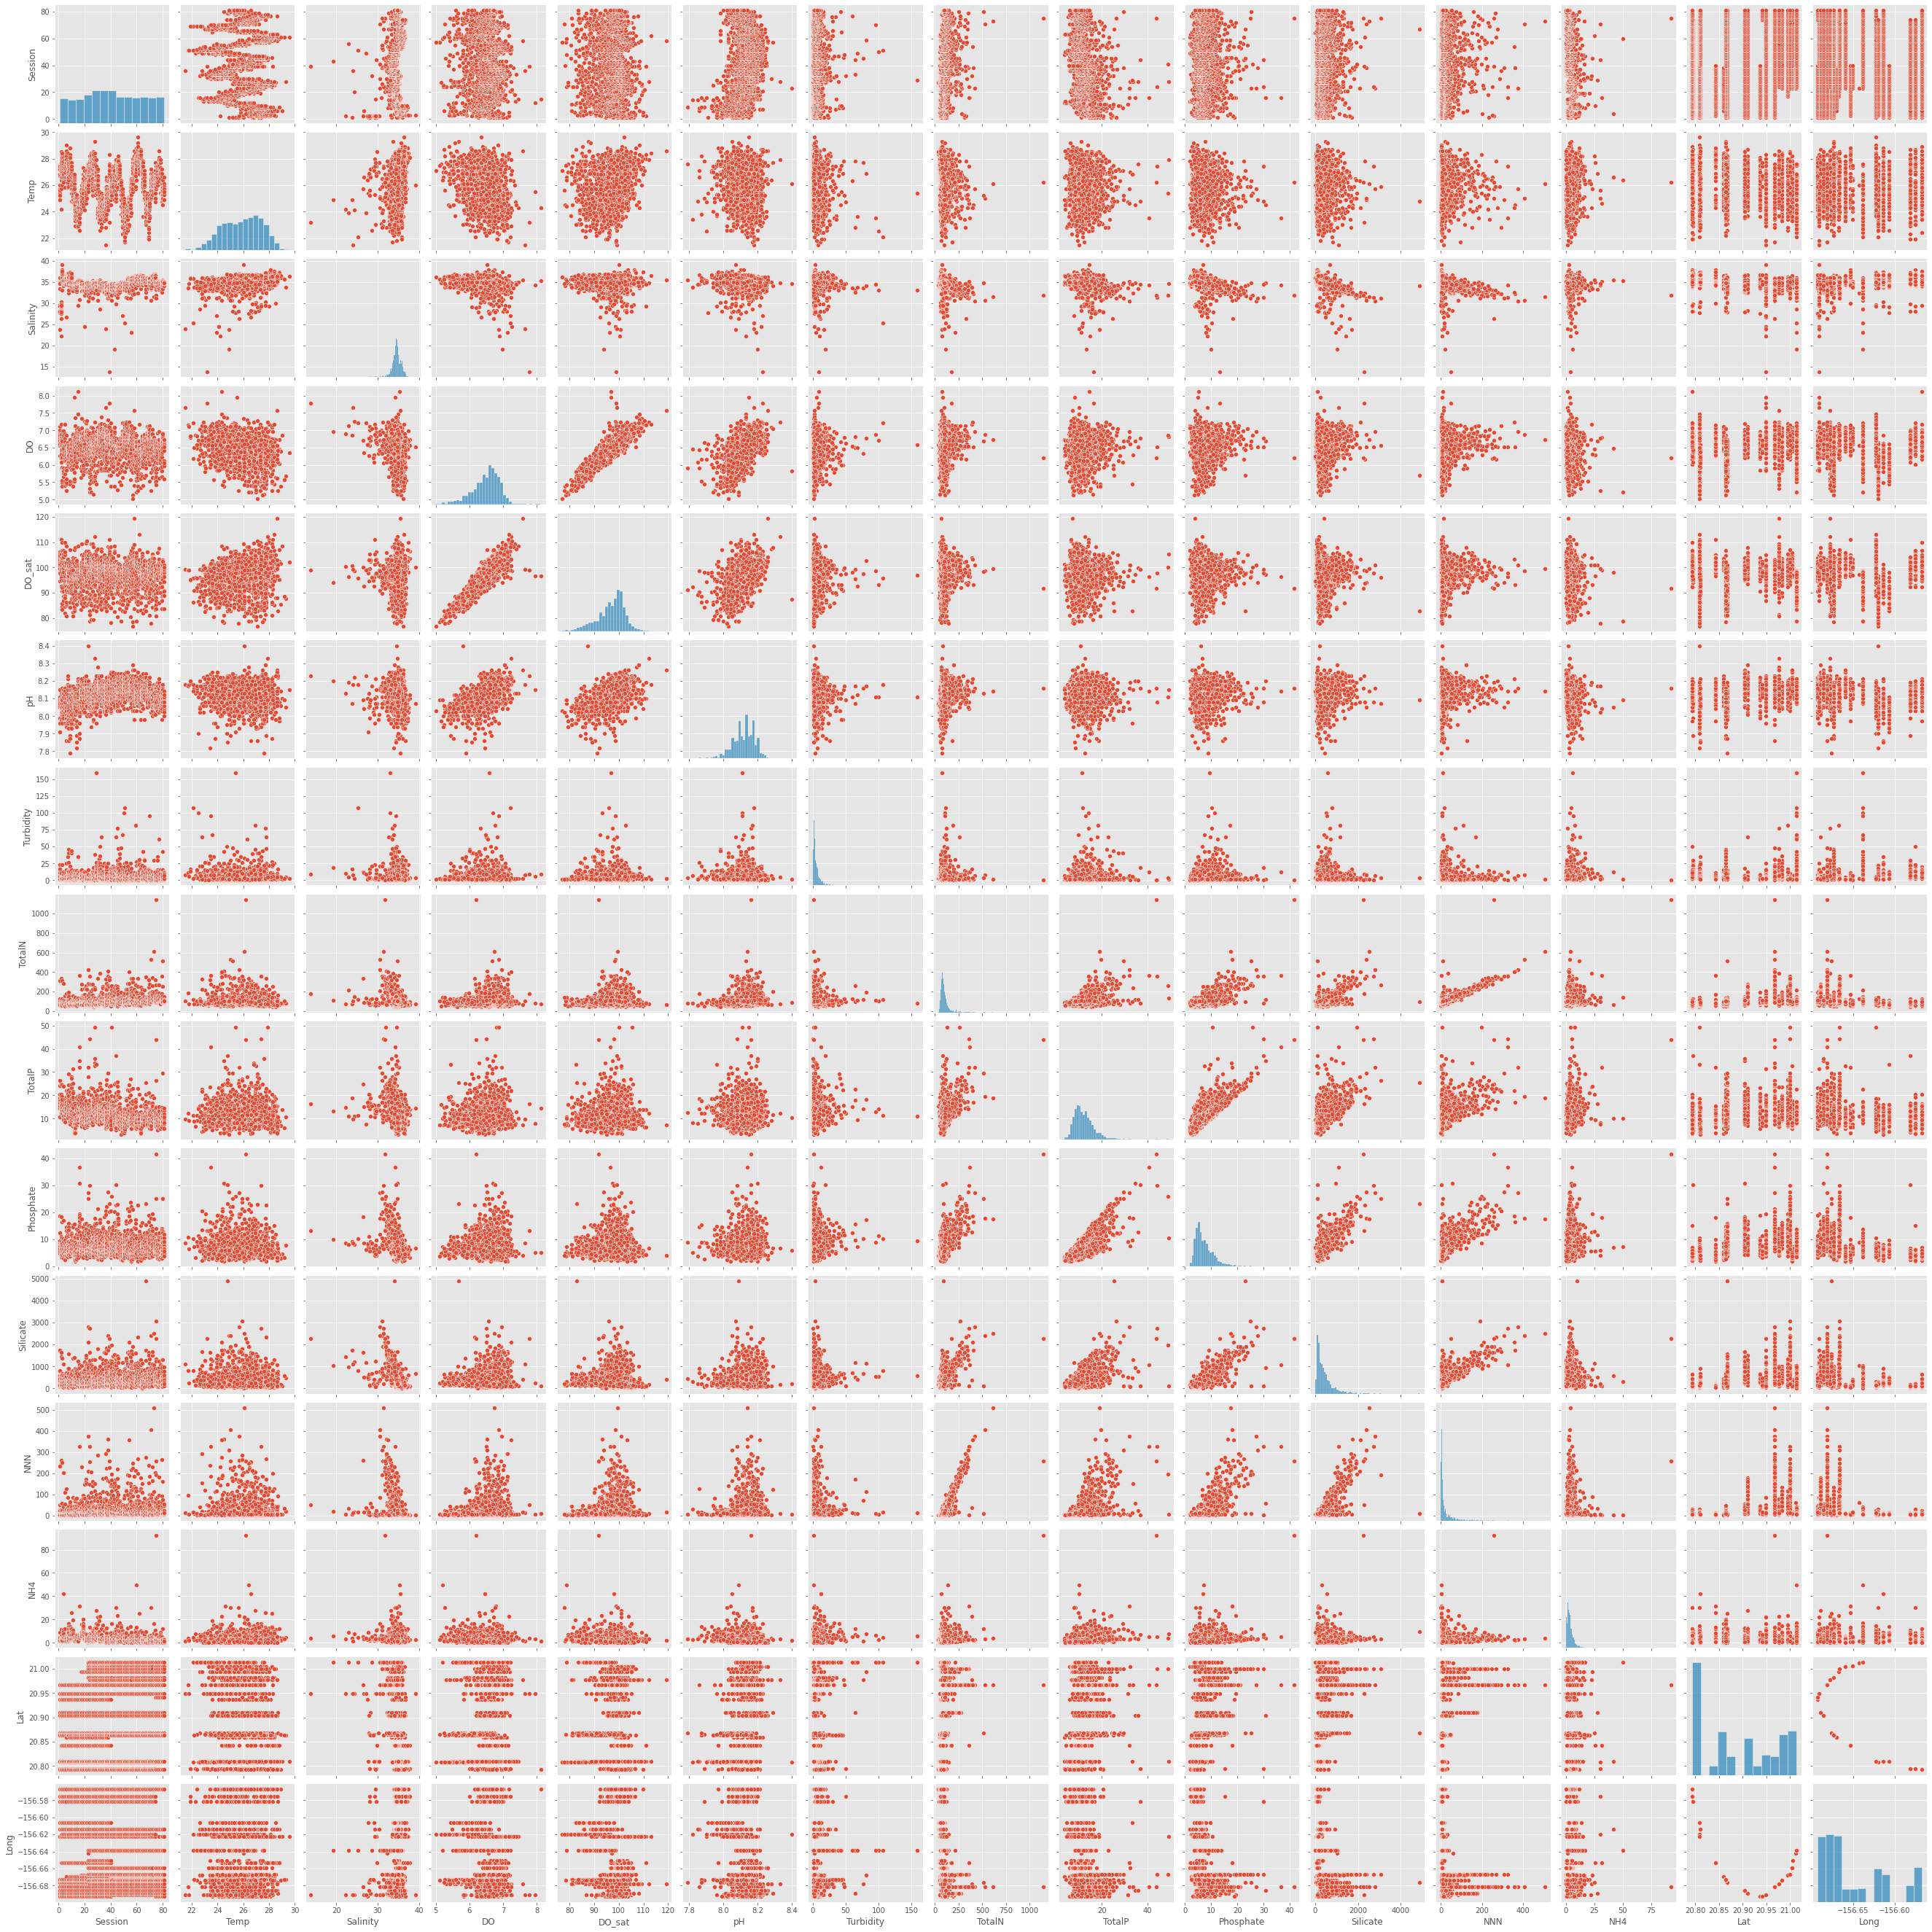

In [10]:
sns.pairplot(westMaui)

In [11]:
#Add Datetime format column
westMaui['Datetime'] = westMaui['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

In [12]:
westMaui.head()

,SampleID,SiteName,Station,Session,Date,Time,Temp,Salinity,DO,DO_sat,...,TotalN,TotalP,Phosphate,Silicate,NNN,NH4,Lat,Long,QA issues or comments,Datetime
0,RPO160614,Pohaku,RPO,1,6/14/16,8:03,25.7,33.3,6.86,102.1,...,311.07,26.26,18.72,1697.47,233.11,2.81,20.967083,-156.681390,NaN,2016-06-14
1,RKS160614,Kaanapali Shores,RKS,1,6/14/16,8:37,24.9,23.8,6.86,100.6,...,75.08,18.80,9.06,1720.37,5.65,4.15,20.949331,-156.691124,NaN,2016-06-14
2,RAB160614,Airport Beach,RAB,1,6/14/16,9:15,26.8,35.0,6.72,101.6,...,91.26,10.73,8.46,604.37,24.72,1.88,20.936669,-156.692780,NaN,2016-06-14
3,RCB160614,Canoe Beach,RCB,1,6/14/16,9:50,27.2,34.7,6.78,103.5,...,117.22,16.68,9.40,576.28,49.04,2.27,20.910347,-156.689382,NaN,2016-06-14
4,RWA160614,Wahikuli,RWA,1,6/14/16,10:24,27.3,34.6,6.66,101.8,...,84.60,24.07,12.38,822.08,21.35,1.50,20.904476,-156.685931,NH4 below detectable limit,2016-06-14


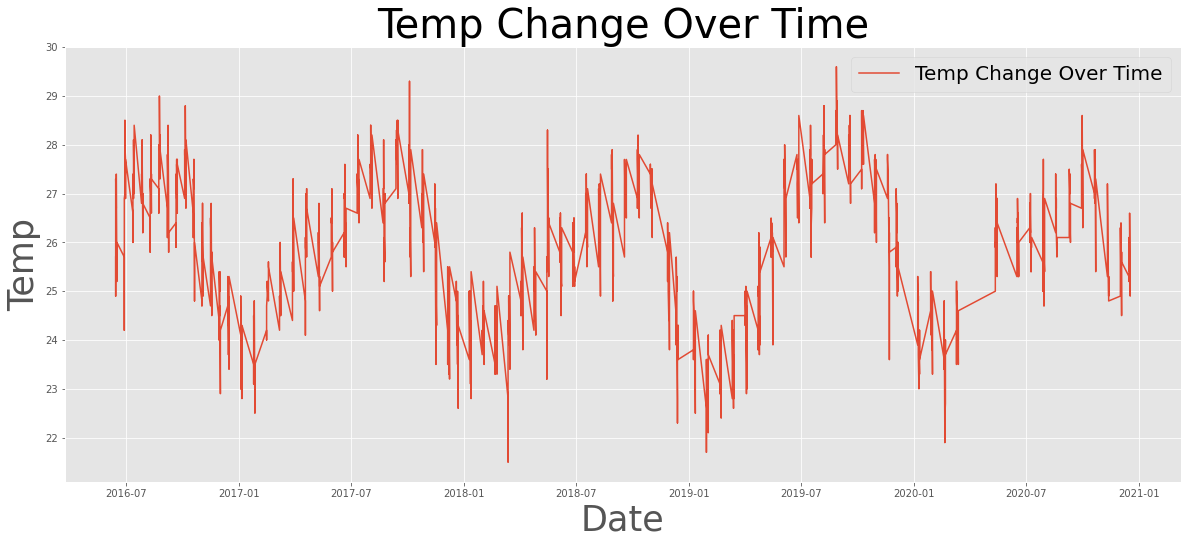

In [14]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = westMaui['Datetime'].to_list()
ax.plot(dates, westMaui['Temp'], label = "Temp Change Over Time")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('Temp', fontsize = 35)
ax.set_title('Temp Change Over Time', fontsize = 40)
ax.legend(fontsize = 20)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)

In [ ]:
westMaui.groupby('Station')['Temp'].mean().plot()

Station
OCO    AxesSubplot(0.125,0.125;0.775x0.755)
OLP    AxesSubplot(0.125,0.125;0.775x0.755)
OMM    AxesSubplot(0.125,0.125;0.775x0.755)
OPB    AxesSubplot(0.125,0.125;0.775x0.755)
OPM    AxesSubplot(0.125,0.125;0.775x0.755)
OPP    AxesSubplot(0.125,0.125;0.775x0.755)
OSF    AxesSubplot(0.125,0.125;0.775x0.755)
OUB    AxesSubplot(0.125,0.125;0.775x0.755)
PFF    AxesSubplot(0.125,0.125;0.775x0.755)
PLH    AxesSubplot(0.125,0.125;0.775x0.755)
PLT    AxesSubplot(0.125,0.125;0.775x0.755)
PPU    AxesSubplot(0.125,0.125;0.775x0.755)
RAB    AxesSubplot(0.125,0.125;0.775x0.755)
RCB    AxesSubplot(0.125,0.125;0.775x0.755)
RFN    AxesSubplot(0.125,0.125;0.775x0.755)
RFS    AxesSubplot(0.125,0.125;0.775x0.755)
RHL    AxesSubplot(0.125,0.125;0.775x0.755)
RKO    AxesSubplot(0.125,0.125;0.775x0.755)
RKS    AxesSubplot(0.125,0.125;0.775x0.755)
RKT    AxesSubplot(0.125,0.125;0.775x0.755)
RKV    AxesSubplot(0.125,0.125;0.775x0.755)
RMO    AxesSubplot(0.125,0.125;0.775x0.755)
RNS    AxesSubplot(0.125

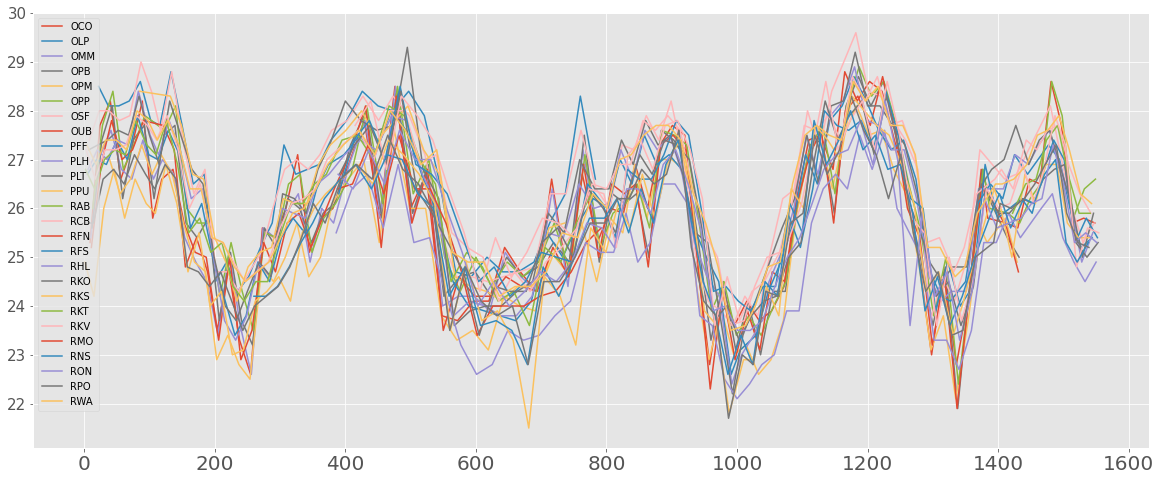

In [15]:
fig, ax = plt.subplots(1, figsize = (20, 8))
westMaui.set_index('Datetime')
westMaui.groupby('Station')['Temp'].plot(legend=True)

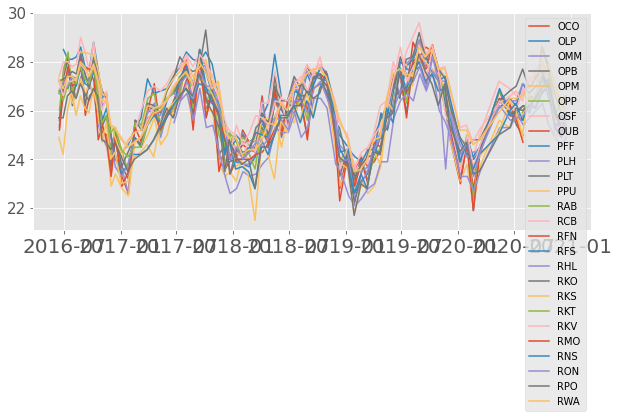

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
for key, grp in westMaui.groupby(['Station']):
    ax.plot(grp['Datetime'], grp['Temp'], label=key)

ax.legend()
plt.show()